# Análise de dados: Falsificação de cédulas de Real (R$)

Neste projeto serão analisados os dados de falsificação de cédulas de Real (R$) com base nos dados (.csv) do período entre 1995 e 2021 acessíveis no portal de [Dados Abertos](https://dadosabertos.bcb.gov.br/) disponibilizados pelo [Banco Central do Brasil](https://www.bcb.gov.br/).

## Demanda da análise

- Demonstrar a evolução das falsificações
- Identificar as cédulas mais falsificadas
- Identificar os estados com mais incidência de falsificações

## Indagações a serem respondidas pela análise exploratória dos dados

1. Qual o total de falsificações por cédula (1995 a 2021)?
2. Qual o total de falsificações por ano (1995 a 2021)?
3. Qual o total de falsificações por cédula e por ano (1995 a 2021)?
4. Qual o total de falsificações por estado no período de 1995 a 2021?

## Importação de pacotes

In [1]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')


## Carregamento dos dados

In [2]:
# Criando um dataframe atribuindo o arquivo csv no diretório dados e definindo o nome das colunas

df = pd.read_csv('dados/Falsificacao_DadosAbertos.csv', sep=';', header=None)

df.columns = ['Ano', 'Estado', 'Família', 'Denominação', 'Quantidade']


## Detalhes do dataframe

In [3]:
# Amostra de dados do dataframe

df.sample(10)


,Ano,Estado,Família,Denominação,Quantidade
2915,2013,MATO GROSSO DO SUL,Cédulas - 2a. família,10.0,"7,00"
1010,2004,RIO GRANDE DO NORTE,Cédulas - 1a. família,5.0,"352,00"
4516,2018,MINAS GERAIS,Cédulas - 1a. família,50.0,"6.075,00"
2277,2011,ACRE,Cédulas - 1a. família,5.0,"5,00"
487,2002,ALAGOAS,Cédulas - 1a. família,50.0,"702,00"
5257,2020,RIO GRANDE DO NORTE,Cédulas - 2a. família,200.0,"1,00"
2044,2009,RONDÔNIA,Cédulas - em polímero,10.0,"6,00"
16,1996,RIO GRANDE DO SUL,Cédulas - 1a. família,10.0,"1,00"
5312,2020,SÃO PAULO,Cédulas - 2a. família,50.0,"19.515,00"
2924,2013,MINAS GERAIS,Cédulas - 2a. família,5.0,"7,00"


In [4]:
# Quantidade de linhas e colunas

df.shape


(5680, 5)

In [5]:
# Removendo a coluna que não será utilizada na análise

df = df.drop(columns=['Família'])
df.shape


(5680, 4)

In [6]:
# Informações das colunas como nome, contagem de linhas nulas e tipo de dados

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5680 entries, 0 to 5679
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ano          5680 non-null   int64  
 1   Estado       5680 non-null   object 
 2   Denominação  5680 non-null   float64
 3   Quantidade   5680 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 177.6+ KB


## Tratando valores nulos

In [7]:
# Identificando a quantidade de valores nulos, no caso não há dados nulos

df.isnull().sum()


Ano            0
Estado         0
Denominação    0
Quantidade     0
dtype: int64

## Tratando os tipos de valores

In [8]:
# Identificando os tipos de dados das colunas

df.dtypes


Ano              int64
Estado          object
Denominação    float64
Quantidade      object
dtype: object

In [9]:
# Efetuando as conversões necessárias dos tipos de dados e exibindo novamente as informações das colunas

df['Ano'] = df['Ano'].astype('int')
df['Quantidade'] = [(str(i).replace('.', ''))
                    for i in df['Quantidade']]  # 1.000,00 para 1000,00
df['Quantidade'] = [(str(i).replace(',', '.'))
                    for i in df['Quantidade']]  # 1000,00 para 1000.00
df['Quantidade'] = [float(str(i)) for i in df['Quantidade']]
df['Quantidade'] = df['Quantidade'].astype('int')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5680 entries, 0 to 5679
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ano          5680 non-null   int32  
 1   Estado       5680 non-null   object 
 2   Denominação  5680 non-null   float64
 3   Quantidade   5680 non-null   int32  
dtypes: float64(1), int32(2), object(1)
memory usage: 133.2+ KB


## Listando valores únicos e removendo inconsistências

In [10]:
# Listando os valores únicos das colunas qualitativas em busca de erros e/ou valores inconsistentes

print(" Ano: ", sorted(df['Ano'].unique()))
print("\n Estado: ", sorted(df['Estado'].unique()))
print("\n Denominação: ", sorted(df['Denominação'].unique()))

 Ano:  [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

 Estado:  ['ACRE', 'ALAGOAS', 'AMAPÁ', 'AMAZONAS', 'BAHIA', 'CEARÁ', 'DISTRITO FEDERAL', 'ESPÍRITO SANTO', 'GOIÁS', 'MARANHÃO', 'MATO GROSSO', 'MATO GROSSO DO SUL', 'MINAS GERAIS', 'NAO INFORMADO', 'PARANÁ', 'PARAÍBA', 'PARÁ', 'PERNAMBUCO', 'PIAUÍ', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE', 'RIO GRANDE DO SUL', 'RONDÔNIA', 'RORAIMA', 'SANTA CATARINA', 'SERGIPE', 'SÃO PAULO', 'TOCANTINS']

 Denominação:  [1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0]


In [11]:
# Criando um dataframe com todos os estados, exceto com valores "NAO INFORMADO"

df_remover = df.loc[df['Estado'] == 'NAO INFORMADO']

df = df.drop(df_remover.index)

print(sorted(df['Estado'].unique()))

['ACRE', 'ALAGOAS', 'AMAPÁ', 'AMAZONAS', 'BAHIA', 'CEARÁ', 'DISTRITO FEDERAL', 'ESPÍRITO SANTO', 'GOIÁS', 'MARANHÃO', 'MATO GROSSO', 'MATO GROSSO DO SUL', 'MINAS GERAIS', 'PARANÁ', 'PARAÍBA', 'PARÁ', 'PERNAMBUCO', 'PIAUÍ', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE', 'RIO GRANDE DO SUL', 'RONDÔNIA', 'RORAIMA', 'SANTA CATARINA', 'SERGIPE', 'SÃO PAULO', 'TOCANTINS']


## Selecionando o período entre 1995 e 2021

In [12]:
# Criando um dataframe com todos os períodos, exceto o ano corrente de 2022

df_remover = df.loc[df['Ano'] == 2022]

df = df.drop(df_remover.index)

print(df['Ano'].unique())


[1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]


## Amostra e resumo estatístico dos dados após tratamento das informações

In [13]:
df.sample(10)


,Ano,Estado,Denominação,Quantidade
1991,2009,PARAÍBA,10.0,43
4200,2017,PARÁ,5.0,27
1255,2005,SÃO PAULO,20.0,14253
1416,2006,RIO DE JANEIRO,100.0,2343
3703,2015,SÃO PAULO,100.0,47279
1579,2007,PARÁ,10.0,1285
4430,2018,CEARÁ,50.0,2103
1076,2005,ALAGOAS,100.0,3
3334,2014,RIO GRANDE DO SUL,5.0,2113
3459,2015,BAHIA,10.0,226


In [14]:
df.describe()

,Ano,Denominação,Quantidade
count,5603.000000,5603.000000,5603.000000
mean,2011.562913,32.989827,1903.643227
std,6.536916,37.951943,7218.388180
min,1995.000000,1.000000,1.000000
25%,2006.000000,5.000000,19.000000
50%,2013.000000,10.000000,152.000000
75%,2017.000000,50.000000,985.500000
max,2021.000000,200.000000,188792.000000


## 1. Qual o total de falsificações por cédula (1995 a 2021)?

             Quantidade          %
Denominação                       
1.0                2427   0.022754
2.0               33633   0.315326
5.0              399974   3.749951
10.0            1693030  15.872980
20.0            1256353  11.778921
50.0            4538656  42.552109
100.0           2690541  25.225131
200.0             51499   0.482828


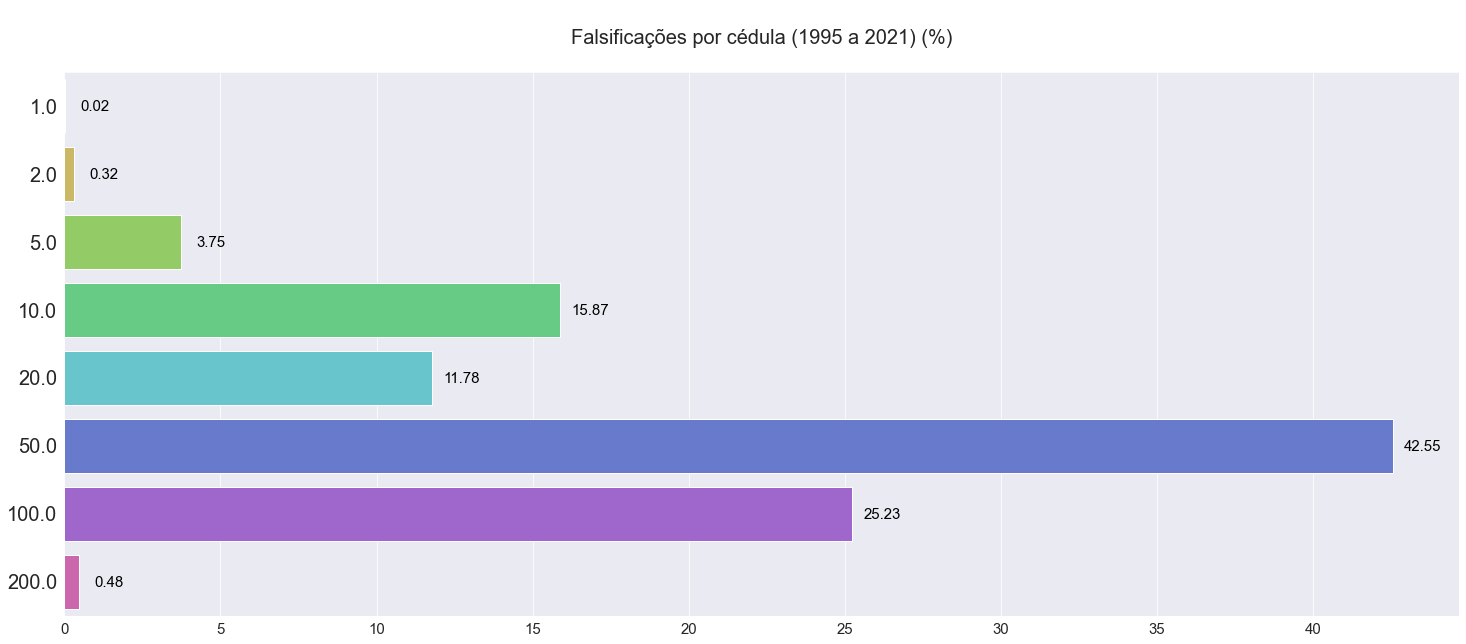

In [15]:
df_temp = df.groupby(['Denominação'])['Quantidade'].sum()
df_denominacao_quantidade = pd.DataFrame(df_temp)
df_denominacao_quantidade['%'] = df_denominacao_quantidade['Quantidade'] / \
    df_denominacao_quantidade['Quantidade'].sum() * 100

print(df_denominacao_quantidade)

plt.figure(figsize=(25, 10))
plot = sns.barplot(y=df_denominacao_quantidade.index,
                   x=df_denominacao_quantidade['%'],
                   orient='h',
                   palette='hls')
for i in plot.patches:
    plot.annotate(format(i.get_width(), '.2f'),
                  (i.get_width(), i.get_y() + i.get_height() / 2),
                  ha='center',
                  va='baseline',
                  fontsize=15,
                  color='black',
                  xytext=(30, -5),
                  textcoords='offset points')

plt.xticks(size=15)
plt.yticks(size=20)
plt.xlabel('')
plt.ylabel('')
plt.title('\nFalsificações por cédula (1995 a 2021) (%)\n', fontsize=20)
plt.show(plot)


As notas de R<span>&#36;</span> 50, R<span>&#36;</span> 100 e R<span>&#36;</span> 10 estão entre as notas mais falsificadas, somente a cédula de R<span>&#36;</span> 50 responde por mais de 42% (4.538.656) do total das falsificações, sendo a nota de R<span>&#36;</span> 100 correspondendo a mais de 25% (2.690.541) do total.

## 2. Qual o total de falsificações por ano (1995 a 2021)?

      Quantidade         %
Ano                       
1995         242  0.002269
1996       16421  0.153955
1997         624  0.005850
1998        6874  0.064447
1999       29162  0.273408
2000      329111  3.085576
2001      381709  3.578708
2002      413862  3.880158
2003      548882  5.146036
2004      499209  4.680327
2005      448072  4.200893
2006      637949  5.981082
2007      678873  6.364765
2008      538120  5.045137
2009      503214  4.717876
2010      434644  4.074999
2011      434084  4.069749
2012      519987  4.875131
2013      551157  5.167365
2014      529578  4.965051
2015      477689  4.478567
2016      506633  4.749931
2017      548542  5.142848
2018      561808  5.267223
2019      498961  4.678002
2020      324985  3.046893
2021      245721  2.303754


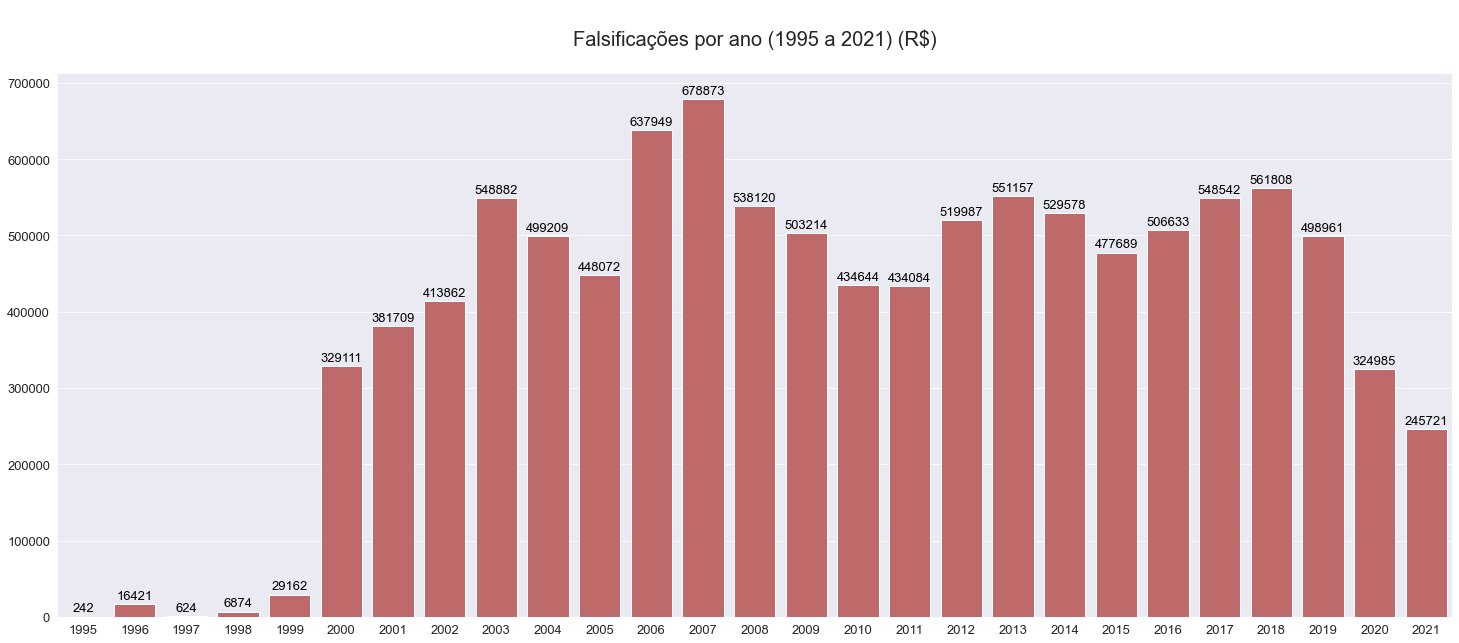

In [16]:
df_temp = df.groupby(['Ano'])['Quantidade'].sum()
df_ano_quantidade = pd.DataFrame(df_temp)
df_ano_quantidade['%'] = df_ano_quantidade['Quantidade'] / \
    df_ano_quantidade['Quantidade'].sum() * 100

print(df_ano_quantidade)

plt.figure(figsize=(25, 10))
plot = sns.barplot(x=df_ano_quantidade.index,
                   y=df_ano_quantidade['Quantidade'],
                   orient='v',
                   palette=['indianred'])
for i in plot.patches:
    plot.annotate(format(i.get_height(), '3.0f'),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=13,
                  color='black',
                  xytext=(0, 5),
                  textcoords='offset points')
plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel('')
plt.ylabel('')
plt.title('\nFalsificações por ano (1995 a 2021) (R$)\n', fontsize=20)
plt.show(plot)


O período entre 2006 e 2007 corresponde aos anos em que houve a maior quantidade de cédulas falsas identificadas pelo Banco Central, sendo que em 2007 houve um recorde de 678.873 notas falsas. Desde que foi iniciado a contabilização de falsificações em 1995, o período entre 2020 e 2021 foi o intervalo em que ocorreram a mais fortes quedas nas falsificações, coincidentemente em 2020 iniciou-se a pandemia de Covid-19.

## 3. Qual o total de falsificações por cédula e por ano (1995 a 2021)?

Ano          1995   1995
Denominação  50.0  100.0
Quantidade    240      2 

Ano         1996  1996  1996   1996
Denominação  5.0  10.0  50.0  100.0
Quantidade     2  6088  8001   2330 

Ano         1997  1997  1997   1997
Denominação  5.0  10.0  50.0  100.0
Quantidade   182   108   154    180 

Ano         1998  1998  1998   1998
Denominação  5.0  10.0  50.0  100.0
Quantidade    72  3512  2181   1109 

Ano         1999 1999   1999   1999   1999
Denominação  1.0  5.0   10.0   50.0  100.0
Quantidade    20  863  12643  14066   1570 

Ano         2000   2000    2000    2000   2000
Denominação  1.0    5.0    10.0    50.0  100.0
Quantidade   294  15914  176003  132244   4656 

Ano         2001   2001    2001  2001    2001   2001
Denominação  1.0    5.0    10.0  20.0    50.0  100.0
Quantidade   336  30340  205249     9  143747   2028 

Ano         2002 2002   2002    2002   2002    2002   2002
Denominação  1.0  2.0    5.0    10.0   20.0    50.0  100.0
Quantidade   405  722  30681  188644  10

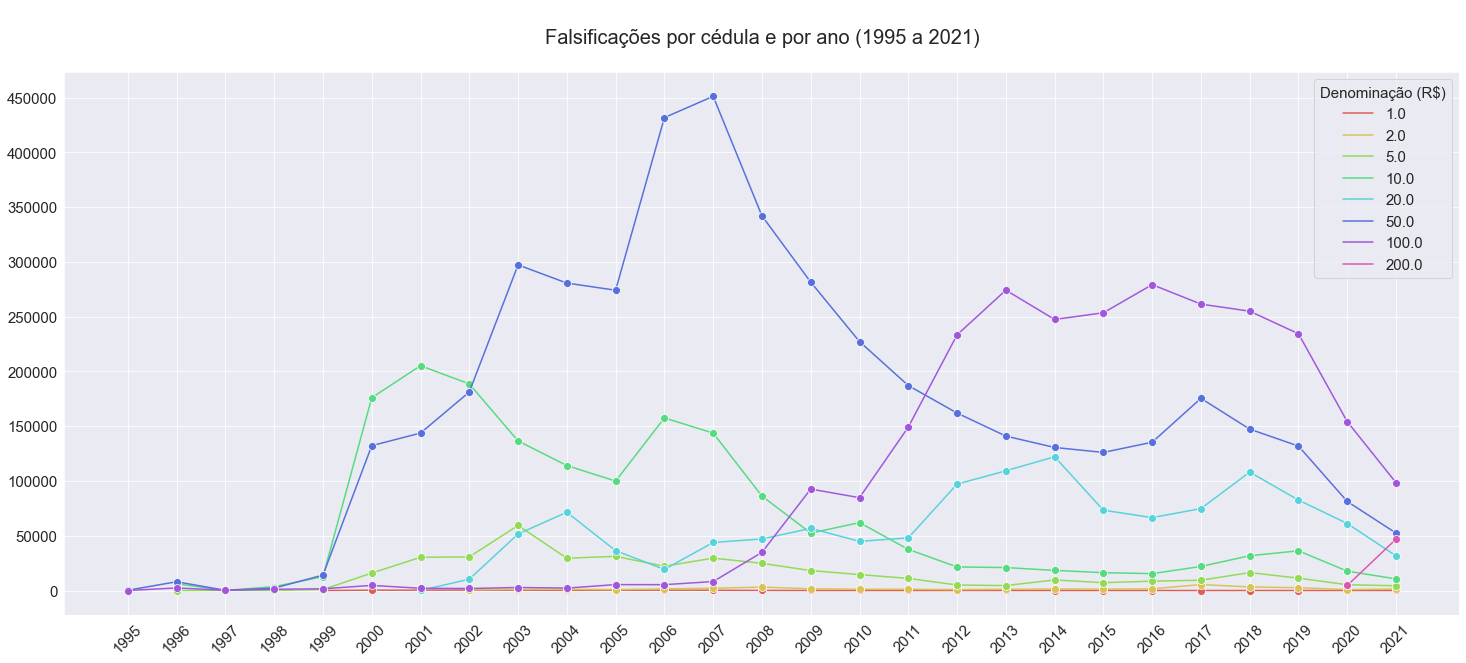

In [17]:
df_temp = df.groupby(['Ano', 'Denominação'])['Quantidade'].sum()
df_ano_denominacao_quantidade = pd.DataFrame(df_temp)

df_ano_denominacao_quantidade.reset_index(level=1, inplace=True, col_level=1)

df_ano_denominacao_quantidade['Denominação'] = df_ano_denominacao_quantidade['Denominação'].astype(
    'str')

tabela = df_ano_denominacao_quantidade.T

for i in set(tabela.columns):
    print(tabela[i], "\n")

plt.figure(figsize=(25, 10))
plot = sns.lineplot(x=df_ano_denominacao_quantidade.index,
                    y=df_ano_denominacao_quantidade['Quantidade'],
                    hue=df_ano_denominacao_quantidade['Denominação'],
                    data=df_ano_denominacao_quantidade,
                    marker='o',
                    markersize=8, palette='hls',
                    hue_order=['1.0', '2.0', '5.0', '10.0', '20.0', '50.0', '100.0', '200.0'])
xlabels = list(set(df_ano_denominacao_quantidade.index.tolist()))
ylabels = np.arange(0, 500000, 50000)
plt.xticks(xlabels, rotation=45, size=15)
plt.yticks(ylabels, size=15)
plt.xlabel('')
plt.ylabel('')
plt.title('\nFalsificações por cédula e por ano (1995 a 2021)\n', fontsize=20)
plt.legend(fontsize=15, title='Denominação (R$)', title_fontsize=15)
plt.show(plot)


No ano de 2001 a cédula de R<span>&#36;</span> 10 era mais identificada como falsa, porém em 2003 com o ápice em 2007 a nota de R<span>&#36;</span> 50 era a mais falsificada, até 2011 houve um forte declínio, em 2012 a cédula de R<span>&#36;</span> 100 passou a ser a que mais apresentava incidência de falsificações e em 2018 iniciou-se uma queda nas três cédulas mais falsificadas (R<span>&#36;</span> 100, R<span>&#36;</span> 50 e R<span>&#36;</span> 20).

## 4. Qual o total de falsificações por estado no período de 1995 a 2021?

                     Quantidade          %
Estado                                    
SÃO PAULO               3726672  34.939364
RIO DE JANEIRO          1167922  10.949837
MINAS GERAIS            1065724   9.991681
PARANÁ                   716458   6.717142
RIO GRANDE DO SUL        661547   6.202325
BAHIA                    458700   4.300536
GOIÁS                    438440   4.110588
SANTA CATARINA           397738   3.728987
PERNAMBUCO               339519   3.183156
DISTRITO FEDERAL         287291   2.693493
CEARÁ                    228143   2.138952
MATO GROSSO DO SUL       227749   2.135258
ESPÍRITO SANTO           125582   1.177392
PARÁ                     122316   1.146772
MARANHÃO                  97759   0.916538
MATO GROSSO               95812   0.898284
PARAÍBA                   73503   0.689126
ALAGOAS                   69406   0.650715
RIO GRANDE DO NORTE       67881   0.636417
PIAUÍ                     66984   0.628008
SERGIPE                   63259   0.593084
AMAZONAS   

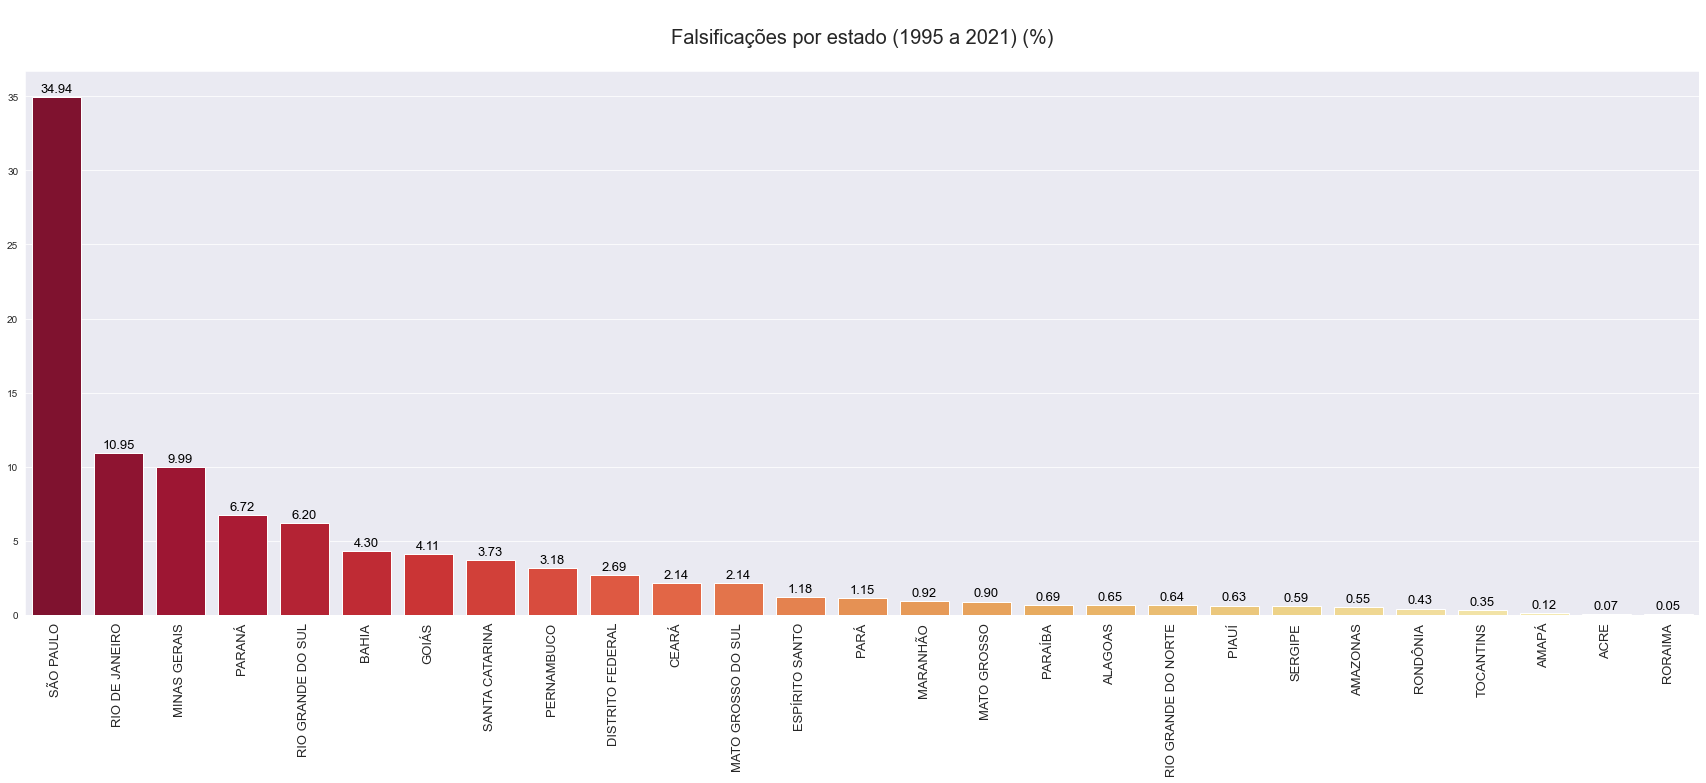

In [18]:
df_temp = df.groupby(['Estado'])['Quantidade'].sum()
df_estado_quantidade = pd.DataFrame(df_temp)
df_estado_quantidade['%'] = df_estado_quantidade['Quantidade'] / \
    df_estado_quantidade['Quantidade'].sum() * 100

df_estado_quantidade = df_estado_quantidade.sort_values(
    'Quantidade', ascending=False)

print(df_estado_quantidade)

plt.figure(figsize=(30, 10))
plot = sns.barplot(x=df_estado_quantidade.index,
                   y=df_estado_quantidade['%'],
                   orient='v',
                   palette='YlOrRd_r')
for i in plot.patches:
    plot.annotate(format(i.get_height(), '.2f'),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=13,
                  color='black',
                  xytext=(0, 5),
                  textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90, size=13)
plt.title('\nFalsificações por estado (1995 a 2021) (%)\n', fontsize=20)
plt.show(plot)


São Paulo lidera na quantidade de cédulas enviadas ao Banco Central e identificadas como falsas, mais de 34% (3.726.672), somando os estados de Rio de Janeiro com mais de 10% (1.167.922) e Minas Gerais com mais de 9% (1.065.724), ambos da região sudeste, temos mais de 55% (5.960.318) de participação no total de notas falsificadas.